
===== EXPENSE TRACKER MENU =====
1. Add Expense
2. View Summary
3. Filter Expenses
4. Generate Report
5. Visualize Data
6. Exit


Enter your choice (1-6):  1
Enter date (YYYY-MM-DD):  2025-12-29
Enter amount:  50000
Enter category:  Prerita
Enter description:  Enjoy


Expense added successfully!

===== EXPENSE TRACKER MENU =====
1. Add Expense
2. View Summary
3. Filter Expenses
4. Generate Report
5. Visualize Data
6. Exit


Enter your choice (1-6):  2



--- Expense Summary ---
Total Expense: ₹1278359.63
Average Expense: ₹2551.62

Category-wise Spending:
Category
Education        173735.54
Entertainment    170451.66
Food             212808.91
Health           171267.55
Prerita           50000.00
Shopping         168102.59
Transport        189398.31
Utilities        142595.07
Name: Amount, dtype: float64

===== EXPENSE TRACKER MENU =====
1. Add Expense
2. View Summary
3. Filter Expenses
4. Generate Report
5. Visualize Data
6. Exit


Enter your choice (1-6):  3
Enter category:  Health


                    Date   Amount Category  Description Payment_Mode  \
10   2024-10-14 00:00:00   411.00   Health   Expense 11         Cash   
11   2024-09-26 00:00:00   149.17   Health   Expense 12  Credit Card   
14   2024-10-31 00:00:00   287.66   Health   Expense 15          UPI   
18   2024-01-13 00:00:00  2574.89   Health   Expense 19  Net Banking   
20   2024-04-20 00:00:00  2791.14   Health   Expense 21  Credit Card   
..                   ...      ...      ...          ...          ...   
464  2024-10-13 00:00:00  1211.91   Health  Expense 465          UPI   
471  2024-06-06 00:00:00  1593.98   Health  Expense 472          UPI   
472  2024-09-17 00:00:00  3911.66   Health  Expense 473         Cash   
481  2024-07-08 00:00:00   103.02   Health  Expense 482         Cash   
491  2024-10-21 00:00:00  2546.98   Health  Expense 492          UPI   

        Merchant   Status      Month  
10   Merchant_18  Pending    October  
11   Merchant_37     Paid  September  
14   Merchant_25  

Enter your choice (1-6):  4



--- Expense Report ---

--- Expense Summary ---
Total Expense: ₹1278359.63
Average Expense: ₹2551.62

Category-wise Spending:
Category
Education        173735.54
Entertainment    170451.66
Food             212808.91
Health           171267.55
Prerita           50000.00
Shopping         168102.59
Transport        189398.31
Utilities        142595.07
Name: Amount, dtype: float64

Top 5 Expenses:
                    Date    Amount   Category  Description Payment_Mode  \
500           2025-12-29  50000.00    Prerita        Enjoy          NaN   
466  2024-06-21 00:00:00   4993.35  Transport  Expense 467  Credit Card   
365  2024-03-31 00:00:00   4990.09  Education  Expense 366  Credit Card   
331  2024-07-12 00:00:00   4985.56  Transport  Expense 332         Cash   
463  2024-07-03 00:00:00   4985.38  Transport  Expense 464  Credit Card   

        Merchant   Status  Month  
500          NaN      NaN    NaN  
466  Merchant_22  Pending   June  
365  Merchant_28     Paid  March  
331  Mercha

Enter your choice (1-6):  5


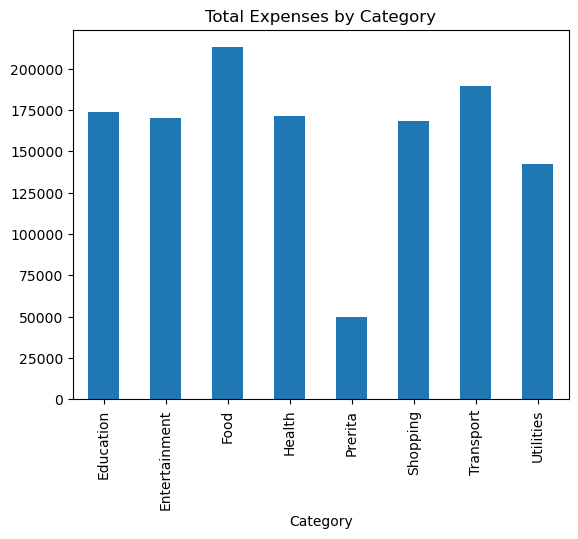

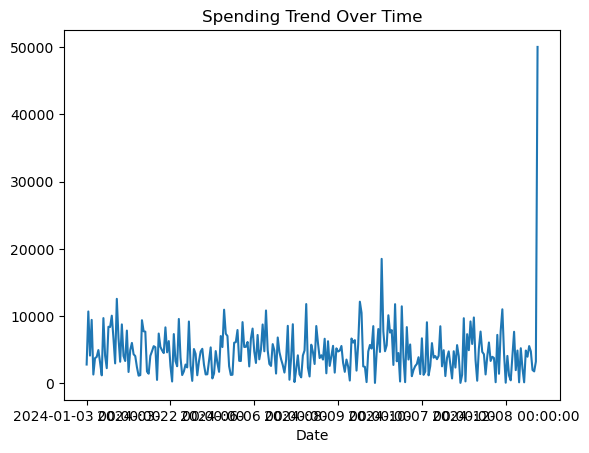

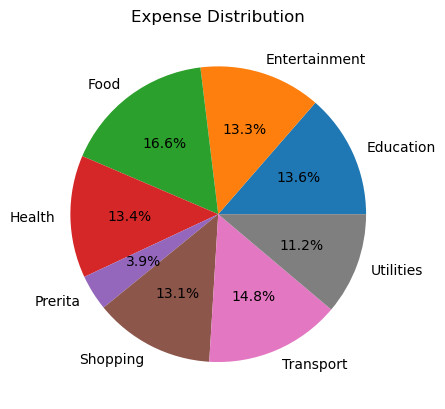

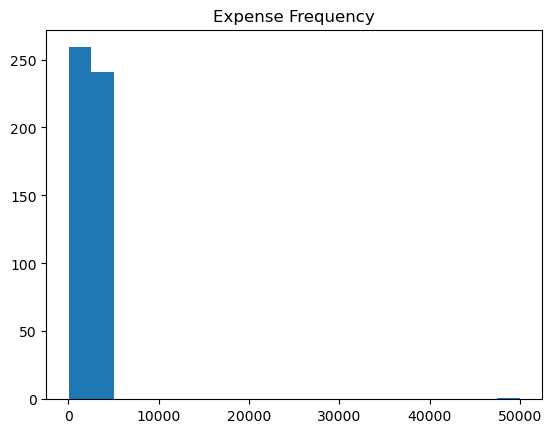


===== EXPENSE TRACKER MENU =====
1. Add Expense
2. View Summary
3. Filter Expenses
4. Generate Report
5. Visualize Data
6. Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# ===============================
# Smart Expense Tracker Application
# ===============================
class ExpenseTracker:

    def __init__(self, csv_file):
        self.csv_file = csv_file
        self.df = pd.read_csv(r"C:\Users\om\Desktop\Data set\expenses.csv")
        self.df["Date"] = pd.to_datetime(self.df["Date"], errors="coerce")

    # -------------------------------
    # 1. Add Expense
    # -------------------------------
    def add_expense(self, date, amount, category, description):
        if amount <= 0:
            print("Amount must be positive.")
            return

        new_expense = {
            "Date": date,
            "Amount": amount,
            "Category": category,
            "Description": description
        }

        self.df = pd.concat([self.df, pd.DataFrame([new_expense])], ignore_index=True)
        self.df.to_csv(self.csv_file, index=False)
        print("Expense added successfully!")

    # -------------------------------
    # 2. Summary
    # -------------------------------
    def get_summary(self):
        total = np.sum(self.df["Amount"])
        average = np.mean(self.df["Amount"])

        print("\n--- Expense Summary ---")
        print(f"Total Expense: ₹{total:.2f}")
        print(f"Average Expense: ₹{average:.2f}")
        print("\nCategory-wise Spending:")
        print(self.df.groupby("Category")["Amount"].sum())

    # -------------------------------
    # 3. Filter Expenses
    # -------------------------------
    def filter_expenses(self, category=None):
        filtered = self.df.copy()

        if category:
            filtered = filtered[filtered["Category"] == category]

        return filtered

    # -------------------------------
    # 4. Generate Report
    # -------------------------------
    def generate_report(self):
        print("\n--- Expense Report ---")
        self.get_summary()
        print("\nTop 5 Expenses:")
        print(self.df.sort_values("Amount", ascending=False).head())

    # -------------------------------
    # 5. Visualize Data
    # -------------------------------
    def visualize_data(self):

        # Bar Chart
        self.df.groupby("Category")["Amount"].sum().plot(kind="bar")
        plt.title("Total Expenses by Category")
        plt.show()

        # Line Graph
        self.df.groupby("Date")["Amount"].sum().plot()
        plt.title("Spending Trend Over Time")
        plt.show()

        # Pie Chart
        self.df.groupby("Category")["Amount"].sum().plot(kind="pie", autopct="%1.1f%%")
        plt.title("Expense Distribution")
        plt.ylabel("")
        plt.show()

        # Histogram
        plt.hist(self.df["Amount"], bins=20)
        plt.title("Expense Frequency")
        plt.show()


# ===============================
# MAIN PROGRAM (MENU)
# ===============================
if __name__ == "__main__":

    tracker = ExpenseTracker(r"C:\Users\om\Desktop\Data set\expenses.csv")

    while True:
        print("\n===== EXPENSE TRACKER MENU =====")
        print("1. Add Expense")
        print("2. View Summary")
        print("3. Filter Expenses")
        print("4. Generate Report")
        print("5. Visualize Data")
        print("6. Exit")

        choice = input("Enter your choice (1-6): ")

        if choice == "1":
            date = input("Enter date (YYYY-MM-DD): ")
            amount = float(input("Enter amount: "))
            category = input("Enter category: ")
            description = input("Enter description: ")
            tracker.add_expense(date, amount, category, description)

        elif choice == "2":
            tracker.get_summary()

        elif choice == "3":
            cat = input("Enter category: ")
            print(tracker.filter_expenses(category=cat))

        elif choice == "4":
            tracker.generate_report()

        elif choice == "5":
            tracker.visualize_data()

        elif choice == "6":
            print("Thank you! Exiting program.")
            break

        else:
            print("Invalid choice! Try again.")
